In [9]:
import numpy as np
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

1) Construct a train dataset and represent them.

Shape of X_train:  (2, 100)
Shape of y_train:  (100,)
Shape of X_Val:  (2, 1100)
Shape of y_Val:  (1100,)
Shape of X_test:  (2, 1000)
Shape of y_test:  (1000,)


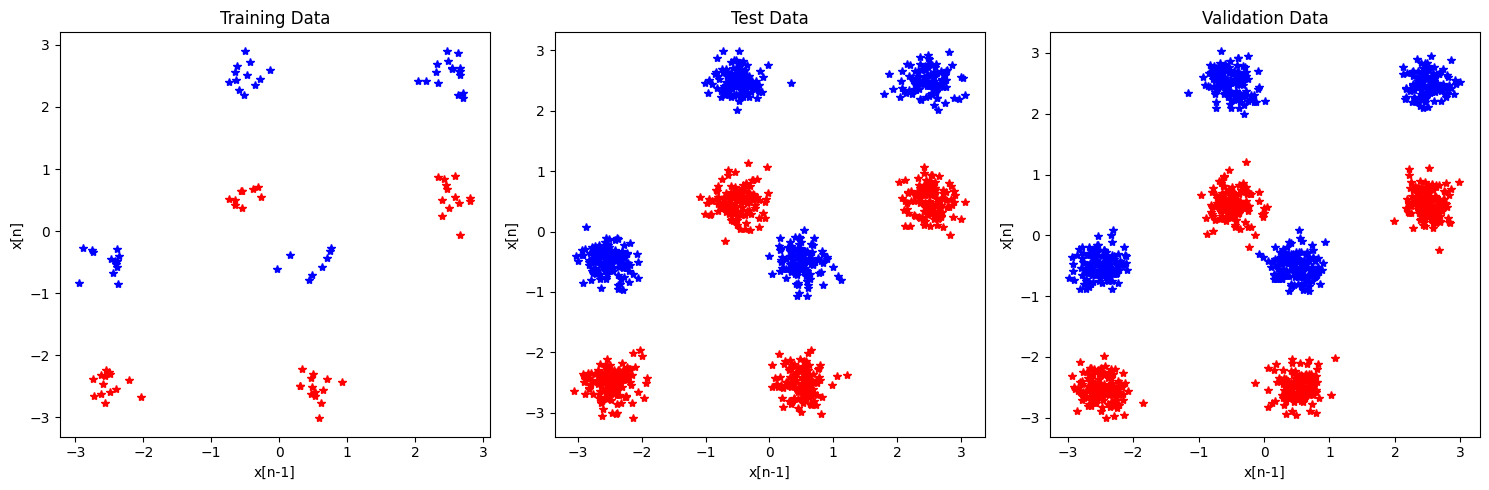

In [10]:
def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,1))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y


data_alpha = 1.5  # Parameter 'a' for data generation
N_train = 100  # Number of training samples
X_train, y_train = data(N_train, data_alpha)

N_Val = 1100  # Number of validation samples
X_Val, y_Val = data(N_Val, data_alpha)

N_test = 1000  # Number of test samples
X_test, y_test = data(N_test, data_alpha)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_Val: ", X_Val.shape)
print("Shape of y_Val: ", y_Val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)


plt.figure(figsize=(15, 5))

plt.subplot(131)
ind1=np.where(y_train==1)
ind2=np.where(y_train==-1)
plt.plot(X_train[0,ind1],X_train[1,ind1],'b*')
plt.plot(X_train[0,ind2],X_train[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Training Data')

plt.subplot(132)
ind1=np.where(y_test==1)
ind2=np.where(y_test==-1)
plt.plot(X_test[0,ind1],X_test[1,ind1],'b*')
plt.plot(X_test[0,ind2],X_test[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Test Data')

plt.subplot(133)
ind1=np.where(y_Val==1)
ind2=np.where(y_Val==-1)
plt.plot(X_Val[0,ind1],X_Val[1,ind1],'b*')
plt.plot(X_Val[0,ind2],X_Val[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Validation Data')

plt.tight_layout()
plt.show()


# Draft Code

Validation Error (Linear Kernel): 0.2290909090909091
Validation Error (Polynomial Kernel): 0.0036363636363636364
Validation Error (RBF Kernel): 0.0


# Draft Printing

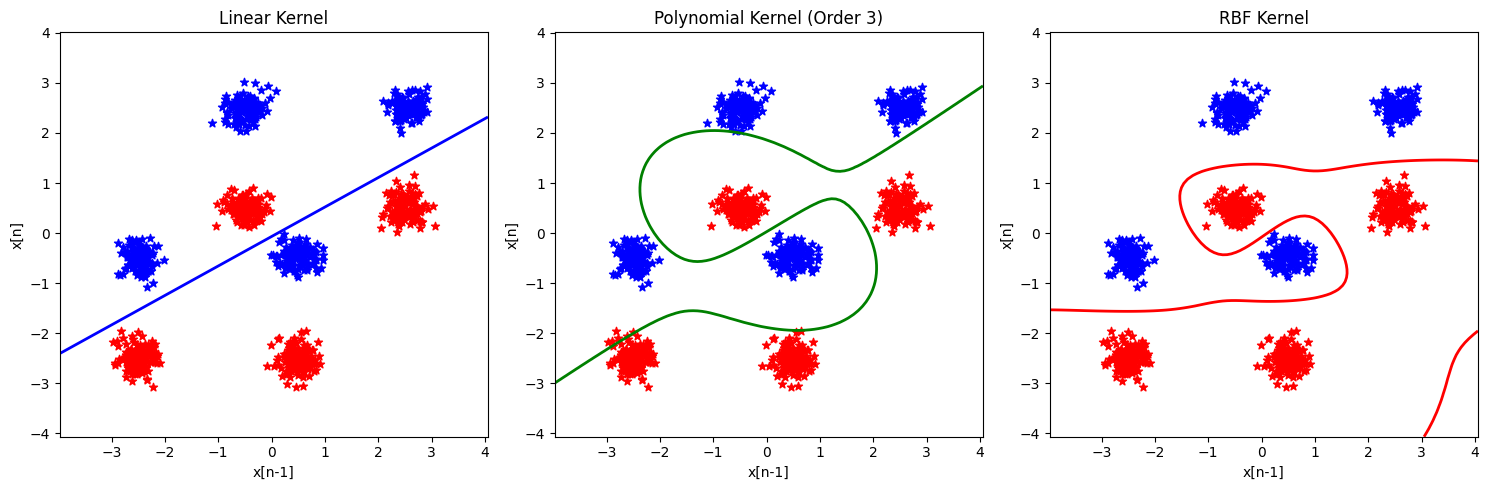

In [50]:
# Generate a grid of points
x_min, x_max = X_test[0, :].min() - 1, X_test[0, :].max() + 1
y_min, y_max = X_test[1, :].min() - 1, X_test[1, :].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Combine xx and yy into a single matrix
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute kernel values between grid points and training data for each kernel
K_test_linear = linear_kernel(grid_points, X_train.T)
K_test_poly = polynomial_kernel(grid_points, X_train.T, degree=3)
K_test_rbf = rbf_kernel(grid_points, X_train.T, gamma=1/(2*sigma**2))

# Predict on grid points for each kernel
Z_linear = clf_linear.decision_function(K_test_linear)
Z_poly = clf_poly.decision_function(K_test_poly)
Z_rbf = clf_rbf.decision_function(K_test_rbf)

# Reshape the decision function values
Z_linear = Z_linear.reshape(xx.shape)
Z_poly = Z_poly.reshape(xx.shape)
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundary for each kernel
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.contour(xx, yy, Z_linear, levels=[0], linewidths=2, colors='blue')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Linear Kernel')

plt.subplot(132)
plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, colors='green')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Polynomial Kernel (Order 3)')

plt.subplot(133)
plt.contour(xx, yy, Z_rbf, levels=[0], linewidths=2, colors='red')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('RBF Kernel')

plt.tight_layout()
plt.show()


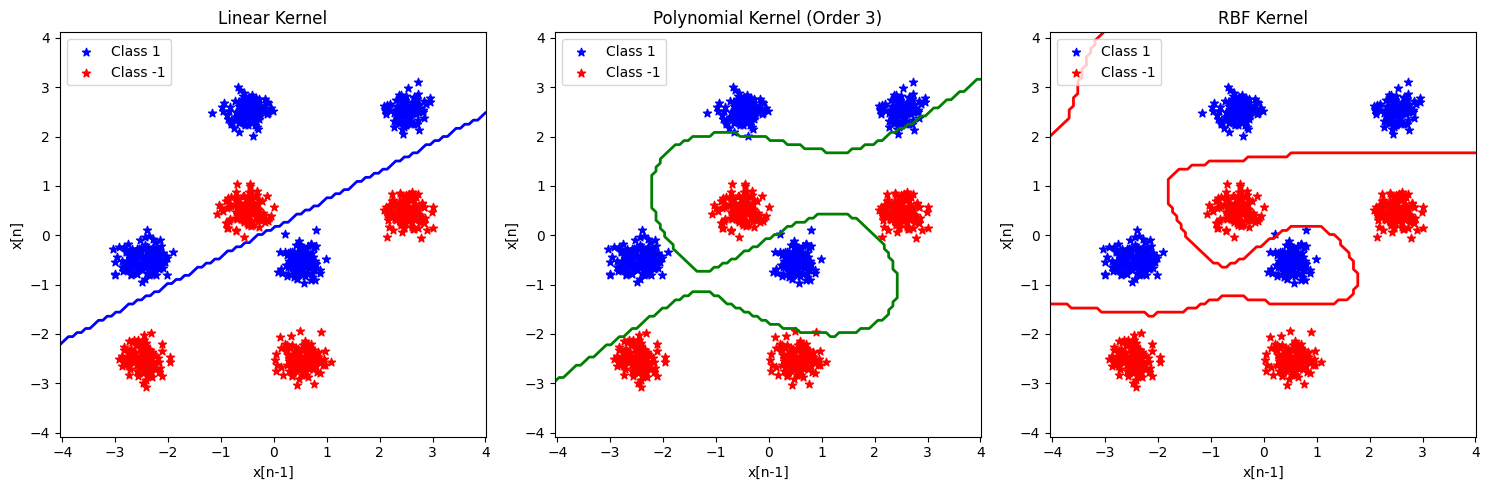

In [45]:
# Generate a grid of points
x_min, x_max = X_test[0, :].min() - 1, X_test[0, :].max() + 1
y_min, y_max = X_test[1, :].min() - 1, X_test[1, :].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Combine xx and yy into a single matrix
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute kernel values between grid points and training data for each kernel
K_test_linear = linear_kernel(grid_points, X_train.T)
K_test_poly = polynomial_kernel(grid_points, X_train.T, degree=3)
K_test_rbf = rbf_kernel(grid_points, X_train.T, gamma=1/(2*sigma**2))

# Predict on grid points for each kernel
Z_linear = clf_linear.predict(K_test_linear)
Z_poly = clf_poly.predict(K_test_poly)
Z_rbf = clf_rbf.predict(K_test_rbf)

# Reshape the predictions
Z_linear = Z_linear.reshape(xx.shape)
Z_poly = Z_poly.reshape(xx.shape)
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundary for each kernel
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.contour(xx, yy, Z_linear, levels=[0], linewidths=2, colors='blue')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Linear Kernel')
plt.legend()

plt.subplot(132)
plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, colors='green')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Polynomial Kernel (Order 3)')
plt.legend()

plt.subplot(133)
plt.contour(xx, yy, Z_rbf, levels=[0], linewidths=2, colors='red')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('RBF Kernel')
plt.legend()

plt.tight_layout()
plt.show()



# Linear Kernel

Best C for Linear Kernel:  1000000.0
Validation error for Linear Kernel:  1.0036363636363637


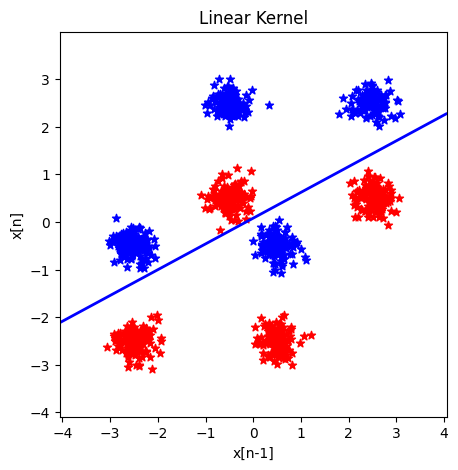

In [54]:
# Computing kernel matrices
K_linear = linear_kernel(X_train.T, X_train.T)
C_high = 10; C_low = -10
C_Values = np.logspace(C_low, C_high, C_high - C_low + 1, base=10)

MMSE_linear = np.zeros(len(C_Values))

# Train SVM with precomputed kernel matrices
for i, C in enumerate(C_Values):
    clf_linear = svm.SVC(kernel='precomputed', C=C)

    # Fit the model
    clf_linear.fit(K_linear, y_train)

    # Validation set
    K_val_linear = linear_kernel(X_Val.T, X_train.T)

    # Predict on validation set
    y_pred_linear = clf_linear.predict(K_val_linear)

    # Compute validation error
    val_error_linear = np.mean(y_pred_linear != y_Val)
    MMSE_linear[i] = mean_squared_error(y_Val, y_pred_linear)

# Find the indices of the best hyperparameters
best_index_linear = np.argmin(MMSE_linear)
best_C_linear = C_Values[best_index_linear]

# Training the SVM with best hyperparameters on the test set
clf_linear_best = svm.SVC(kernel='precomputed', C=best_C_linear)
clf_linear_best.fit(K_linear, y_train)
K_test_linear = linear_kernel(X_test.T, X_train.T)
y_pred_linear = clf_linear_best.predict(K_test_linear)
test_MMSE_linear = mean_squared_error(y_test, y_pred_linear)

# Print validation errors
print("Best C for Linear Kernel: ", best_C_linear)
print("Validation error for Linear Kernel: ", MMSE_linear[best_index_linear])

# Printing and plotting the results

# Generate a grid of points
x_min, x_max = X_test[0, :].min() - 1, X_test[0, :].max() + 1
y_min, y_max = X_test[1, :].min() - 1, X_test[1, :].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Combine xx and yy into a single matrix
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute kernel values between grid points and training data for each kernel
K_test_linear = linear_kernel(grid_points, X_train.T)

# Predict on grid points for each kernel
Z_linear = clf_linear_best.decision_function(K_test_linear)

# Reshape the decision function values
Z_linear = Z_linear.reshape(xx.shape)

# Plot decision boundary for each kernel
plt.figure(figsize=(5, 5))
plt.contour(xx, yy, Z_linear, levels=[0], linewidths=2, colors='blue')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Linear Kernel')
plt.show()

# Polynomial Order 3 Kernel

Best C for Polynomial Kernel:  1.0


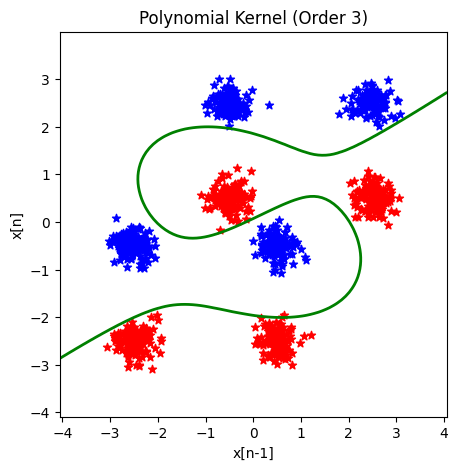

In [66]:
# Kernel Parameter
degree=3
C_high = 10; C_low = 0
C_Values = np.logspace(C_low, C_high, C_high - C_low + 1, base=10)

MMSE_poly = np.zeros(len(C_Values))

# Computing kernel matrices
K_poly = polynomial_kernel(X_train.T, X_train.T, degree=degree)

# Train SVM with precomputed kernel matrices
for i, C in enumerate(C_Values):
    clf_poly = svm.SVC(kernel='precomputed', C=C)

    # Fit the model
    clf_poly.fit(K_poly, y_train)

    # Validation set
    K_val_poly = polynomial_kernel(X_Val.T, X_train.T, degree=degree)

    # Predict on validation set
    y_pred_poly = clf_poly.predict(K_val_poly)

    # Compute validation error
    MMSE_poly = mean_squared_error(y_Val, y_pred_poly)

# Find the indices of the best hyperparameters
best_index_poly = np.argmin(MMSE_poly)
best_C_poly = C_Values[best_index_poly]

# Training the SVM with best hyperparameters on the test set
clf_poly_best = svm.SVC(kernel='precomputed', C=best_C_poly)
clf_poly_best.fit(K_poly, y_train)
K_test_poly = polynomial_kernel(X_test.T, X_train.T, degree=degree)
y_pred_poly = clf_poly_best.predict(K_test_poly)
test_MMSE_poly = mean_squared_error(y_test, y_pred_poly)

# Print Validation errors
print("Best C for Polynomial Kernel: ", best_C_poly)
# print("Validation error for Polynomial Kernel: ", MMSE_poly[best_index_poly])

# Printing and plotting the results

# Generate a grid of points
x_min, x_max = X_test[0, :].min() - 1, X_test[0, :].max() + 1
y_min, y_max = X_test[1, :].min() - 1, X_test[1, :].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Combine xx and yy into a single matrix
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute kernel values between grid points and training data for each kernel
K_test_poly = polynomial_kernel(grid_points, X_train.T, degree=degree)

# Predict on grid points for each kernel
Z_poly = clf_poly_best.decision_function(K_test_poly)

# Reshape the decision function values
Z_poly = Z_poly.reshape(xx.shape)

# Plot decision boundary for each kernel
plt.figure(figsize=(5, 5))
plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, colors='green')
plt.scatter(X_test[0, y_test == 1], X_test[1, y_test == 1], c='blue', marker='*', label='Class 1')
plt.scatter(X_test[0, y_test == -1], X_test[1, y_test == -1], c='red', marker='*', label='Class -1')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title('Polynomial Kernel (Order 3)')
plt.show()

# Radial Basis Function Kernel

In [47]:
gamma_high = 1
gamma_low = -6
gamma_values = np.logspace(-6, 1, gamma_high-gamma_low+1, base=10)

C_high = 1
C_low = -6
C_values = np.logspace(-6, 1, C_high-C_low+1, base=10)


mse_values = np.zeros((len(gamma_values), len(C_values)))
total_iterations = len(gamma_values) * len(C_values)

for i, gamma in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        K_train = rbf_kernel(X_train.T, gamma=gamma)
        svm_rbf = SVC(kernel='precomputed', C=c).fit(K_train, y_train)
        
        # Validating the model
        K_val = rbf_kernel(X_Val.T, gamma=gamma)
        Yval_Pred_rbf = svm_rbf.predict(K_val)        
        mse_val_value = mean_squared_error(y_Val, Yval_Pred_rbf)
        mse_values[i, j] = mse_val_value

        if (i * len(C_values) + j) % (total_iterations // 10) == 0:
            print(f"{i * len(C_values) + j / total_iterations * 100:.2f} % completed")

best_gamma_index, best_C_index = np.unravel_index(mse_values.argmin(), mse_values.shape)
best_gamma = gamma_values[best_gamma_index]
best_C = C_values[best_C_index]
best_val_MSE = mse_values[best_gamma_index, best_C_index]

# Training the model with the best hyperparameters on the test set
K_test = rbf_kernel(X_test.T, gamma=best_gamma)
rbf_test = SVC(kernel='precomputed', C=best_C).fit(K_test, y_test)
Ytest_Pred_rbf = rbf_test.predict(K_test)
test_MSE = mean_squared_error(y_test, Ytest_Pred_rbf)

fig = plt.figure(figsize=(15, 7))
plt.suptitle("rbf_kernel")

ax1 = fig.add_subplot(121, projection='3d')
G,C = np.meshgrid(gamma_values, C_values)
surf = ax1.plot_surface(C, G, mse_values, cmap='viridis', linewidth=0, antialiased=False)
ax1.view_init(elev=30, azim=30)
ax1.set_xlabel('gamma')
ax1.set_ylabel('C')
ax1.set_zlabel('MSE')
ax1.set_title("Validation MSE")


# Printing the 2D map of the test set and the decision boundary
ax2 = fig.add_subplot(122)
ind1=np.where(y_test==1)
ind2=np.where(y_test==-1)
ax2.plot(X_test[0,ind1],X_test[1,ind1],'b*')
ax2.plot(X_test[0,ind2],X_test[1,ind2],'r*')
ax2.plot(X_test[0], Ytest_Pred_rbf, 'k*')
ax2.set_xlabel('x[n-1]')
ax2.set_ylabel('x[n]')
ax2.set_title("Test set")
ax2.legend()

plt.tight_layout()
plt.show()

print("Best gamma: ", best_gamma)
print("Best C: ", best_C)
print("Best validation MSE: ", best_val_MSE)
print("Test MSE: ", test_MSE)

ValueError: X has 110 features, but SVC is expecting 100 features as input.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define your gamma and C values
gamma_high = 1
gamma_low = -6
gamma_values = np.logspace(gamma_low, gamma_high, gamma_high-gamma_low+1, base=10)

C_high = 1
C_low = -6
C_values = np.logspace(C_low, C_high, C_high-C_low+1, base=10)

print(X_train.shape)
print(y_train.shape)

# Initialize an array to store accuracy values
accuracy_values = np.zeros((len(gamma_values), len(C_values)))

total_iterations = len(gamma_values) * len(C_values)

for i, gamma in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        # Train SVC model
        svm_model = SVC(kernel='rbf', gamma=gamma, C=c)
        svm_model.fit(X_train, y_train)
        
        # Validate the model
        y_val_pred = svm_model.predict(X_Val)
        accuracy = accuracy_score(y_Val, y_val_pred)
        accuracy_values[i, j] = accuracy

        progress = (i * len(C_values) + j) / total_iterations * 100
        print(f"{progress:.2f} % completed")

# Find the indices of the best hyperparameters
best_gamma_index, best_C_index = np.unravel_index(accuracy_values.argmax(), accuracy_values.shape)
best_gamma = gamma_values[best_gamma_index]
best_C = C_values[best_C_index]
best_val_accuracy = accuracy_values[best_gamma_index, best_C_index]

print("Best gamma: ", best_gamma)
print("Best C: ", best_C)
print("Best validation accuracy: ", best_val_accuracy)


(2, 100)
(100,)


ValueError: Found input variables with inconsistent numbers of samples: [2, 100]